In [ ]:
!pip install tensorflow==1.15.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -q lucid>=0.2.3
!pip install -q moviepy

In [ ]:
!pip install imageio==2.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import json
import moviepy.editor as mvp
from google.colab import files
import tensorflow.compat.v1.gfile as gfile
import lucid.misc.io.showing as show

In [ ]:
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 800,600
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


In [ ]:
# Let's render something!


def midpointcircleHW(r, c1,c2):
  d=1-r
  x=0
  y=r
  circlePointsHM(x+c1,y+c2)
  while (x<y):
    if d<0:
      d=d+2*x+3
      x=x+1
    else:
      d=d+2*x-2*y+5
      x=x+1
      y=y-1
    circlePointsHM(x+c1,y+c2)


    



In [ ]:
def circlePointsHM(x,y):
  gl.glPointSize(5)
  gl.glColor3f(.156, .197, .161)
  x=x/100
  y=y/100


  gl.glBegin(gl.GL_POINTS)
  gl.glVertex2f(x,y)
  gl.glVertex2f(y,x)
  gl.glVertex2f(y,-x)
  gl.glVertex2f(x,-y)
  gl.glVertex2f(-x,-y)
  gl.glVertex2f(-y,-x)
  gl.glVertex2f(-y,x)
  gl.glVertex2f(-x,y)
  gl.glEnd()

In [ ]:

midpointcircleHW(40,0,0)
midpointcircleHW(20,20,0)
midpointcircleHW(20,-20,0)
midpointcircleHW(20,0,20)
midpointcircleHW(20,0,-20)
midpointcircleHW(20,15,15)
midpointcircleHW(20,-15,15)
midpointcircleHW(20,-15,-15)
midpointcircleHW(20,15,-15)



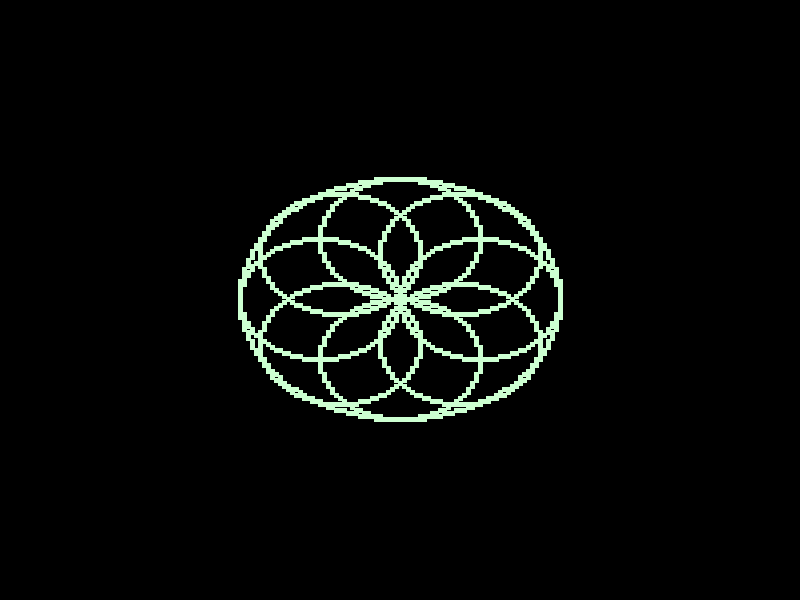

In [ ]:
img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
show.image(img/255.0)